among all the knn models with different K values, k=1 gives the best accuracy on the test set with random oversampling, with over 90% accuracy score. however this might be for the following reasons: 
- the 1NN classifier have remembered the correct labels
- the values of the test set are closely similar to the training set

therefore as the final best model, knn with k=27 on the original dataset is trained to overcome the problem of overfitting. 

to overcome the class imbalance problems the weights for knn algorithm is chosen as 'distance'. 

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import RocCurveDisplay 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load preprocessed original data
X_org_train = pd.read_csv('data/org/X_org_train.csv')
X_org_test = pd.read_csv('data/org/X_org_test.csv')

y_org_train = pd.read_csv('data/org/y_org_train.csv')
y_org_test = pd.read_csv('data/org/y_org_test.csv')

In [3]:
### knn model hyperparameters ###
K =  27 # number of neighbors
WEIGHTS = 'distance' # weights 
ALGORITHM = 'auto'

In [4]:
knn = KNeighborsClassifier(n_neighbors=K, weights=WEIGHTS, algorithm=ALGORITHM)
knn.fit(X_org_train, y_org_train)
y_pred = knn.predict(X_org_test)
accuracy = accuracy_score(y_true=y_org_test, y_pred=y_pred)

In [6]:
print(f'{accuracy = }')

accuracy = 0.8391411752338904


<AxesSubplot: >

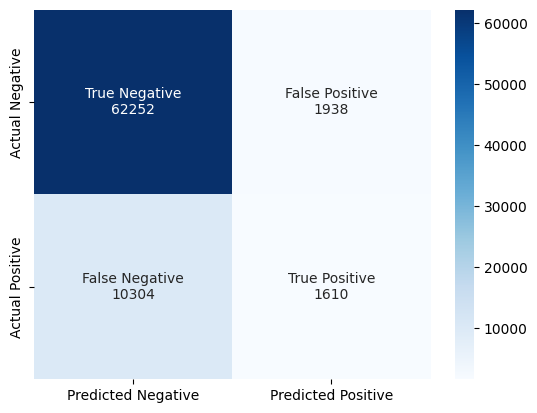

In [10]:
cf_matrix = confusion_matrix(y_true=y_org_test, y_pred=y_pred)

# preparing the labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten() ]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2, 2)
axxlabels = ['Predicted Negative', 'Predicted Positive']
axylabels = ['Actual Negative', 'Actual Positive']


# plotting the confusion matrix
sns.heatmap(cf_matrix, annot=annotations, 
            fmt='', xticklabels=axxlabels, yticklabels=axylabels, 
            cmap=sns.color_palette('Blues', as_cmap=True))

In [11]:
# calculate accuracy, sensitivity & specifity
tn = cf_matrix.flatten()[0] # true negative
fp = cf_matrix.flatten()[1] # false positive
fn = cf_matrix.flatten()[2] # false negative
tp = cf_matrix.flatten()[3] # true positive

accuracy_score = (tp + tn) / (tn + fp + fn + tp) * 100
tpr = (tp / (tp + fn)) * 100
tnr = (tn / (tn + fp)) * 100

print(f'accuracy score is {accuracy_score}')
print(f'true positive rate is {tpr}')
print(f'true negative rate is {tnr}')

accuracy score is 83.91411752338904
true positive rate is 13.513513513513514
true negative rate is 96.98083813678143


it turned out however the model predicts the negative classes well, but fails to predict the  positive  classes since it's tpr is about 13%. 
the reason would be the issue of class imbalance. that is why the second best model with random oversampling is being trained to be evaluated. 

## load random oversampling dataset

In [4]:
# load random oversampling data
X_ros_train = pd.read_csv('data/ros/X_ros_train.csv')
X_ros_test = pd.read_csv('data/ros/X_ros_test.csv')

y_ros_train = pd.read_csv('data/ros/y_ros_train.csv')
y_ros_test = pd.read_csv('data/ros/y_ros_test.csv')

with K=3 and k=5 the model achieved over 80% accuracy. so we train the model with k=5. 

In [5]:
### knn model hyperparameters ###
K2 =  5 # number of neighbors
WEIGHTS2 = 'uniform' # weights 
ALGORITHM = 'auto'

In [6]:
knn2 = KNeighborsClassifier(n_neighbors=K2, weights=WEIGHTS2, algorithm=ALGORITHM)
knn2.fit(X_ros_train, y_ros_train)

KNeighborsClassifier()

In [7]:
y_pred2 = knn2.predict(X_ros_test)

In [8]:
accuracy2 = accuracy_score(y_true=y_ros_test, y_pred=y_pred2)

In [10]:
print(f'{accuracy2 = }')

accuracy2 = 0.8031695028934193


<AxesSubplot: >

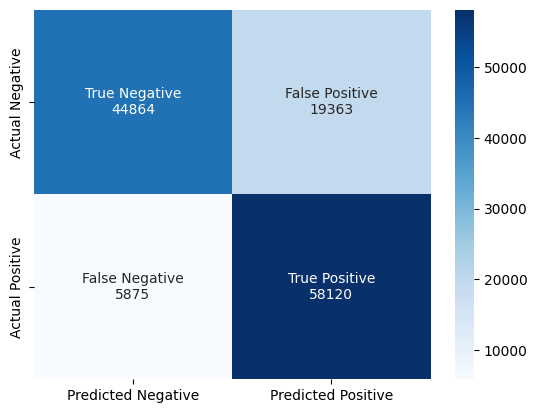

In [12]:
cf_matrix2 = confusion_matrix(y_true=y_ros_test, y_pred=y_pred2)

# preparing the labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in cf_matrix2.flatten() ]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2, 2)
axxlabels = ['Predicted Negative', 'Predicted Positive']
axylabels = ['Actual Negative', 'Actual Positive']


# plotting the confusion matrix
sns.heatmap(cf_matrix2, annot=annotations, 
            fmt='', xticklabels=axxlabels, yticklabels=axylabels, 
            cmap=sns.color_palette('Blues', as_cmap=True))

In [13]:
# calculate accuracy, sensitivity & specifity 
tn = cf_matrix2.flatten()[0] # true negative
fp = cf_matrix2.flatten()[1] # false positive
fn = cf_matrix2.flatten()[2] # false negative
tp = cf_matrix2.flatten()[3] # true positive

accuracy_score = (tp + tn) / (tn + fp + fn + tp) * 100
tpr = (tp / (tp + fn)) * 100
tnr = (tn / (tn + fp)) * 100

print(f'accuracy score is {accuracy_score}')
print(f'true positive rate is {tpr}')
print(f'true negative rate is {tnr}')

accuracy score is 80.31695028934193
true positive rate is 90.81959528088132
true negative rate is 69.85224282622573


it turned out that however the second best model gives slighly lower overal accuracy (acc~80%) but it does a better job overal with true positive rate about 90% and true negative rate (specifity) about 70%. 

given that it is a medical situation the model assist predicting positive classes with true positive rate (sensitivity) of over 90% but it is not suggested to be used to predict negative classes. 

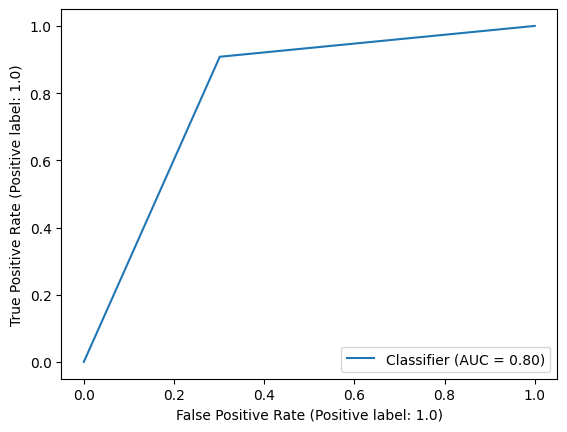

In [14]:
RocCurveDisplay.from_predictions(y_true=y_ros_test, y_pred=y_pred2, pos_label=1.0)

when AUC = 1, the classifier can correctly distinguish between all the positive and the negative class points. if, however, the AUC had been 0, then the classifier would predict all negatives as positives and all positives as negatives. when AUC = 0.5, then the classifier is not able to distinguish between positive and negative class points. it is like tossing a coin to predict classes. 

the model above with AUC = 0.8 seems to do a good job at distinguishing between positive and negative classes. 